# Линейная алгебра. Лабораторная работа 1, осень 2022


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [ ]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [ ]:
Z = np.zeros((3,4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
Y = np.diag([1,2,3,4,5])
print(Y)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [ ]:
print(np.trace(Y))

15


In [ ]:
A = np.linalg.inv(Y)
print(A)

[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


In [ ]:
X = np.random.rand(4,5)
print(X)

[[0.6054895  0.59796183 0.53905981 0.6214041  0.14909054]
 [0.13978133 0.58053089 0.69793728 0.44649871 0.44469613]
 [0.32495556 0.8912326  0.5814848  0.11431954 0.47875391]
 [0.84627738 0.29139232 0.91858589 0.92069005 0.4401781 ]]


In [ ]:
x = X[np.ix_([1, 2], [0, 1])]
print(np.linalg.det(x))

-0.06406906132767438


In [ ]:
print(X.T @ X)

[[1.20793788 0.97941671 1.39028883 1.25497378 0.68051949]
 [0.97941671 1.5737795  1.51341842 1.00094954 0.9022559 ]
 [1.39028883 1.51341842 1.95962652 1.55881003 1.07346824]
 [1.25497378 1.00094954 1.55881003 1.44624327 0.75120025]
 [0.68051949 0.9022559  1.07346824 0.75120025 0.64294471]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
def my_det(X):
    new = np.array(X, np.longdouble)
    x_dem, y_dem = new.shape[0], new.shape[1]
    if x_dem != y_dem:
        raise ValueError
    for i in range(x_dem):
        if new[i][i] == 0:
            for j in range(i + 1, x_dem):
                if new[j][i] != 0:
                    new[i] += new[j]
        if new[i][i] != 0:
            for m in range(i + 1, x_dem):
                new[m] -= new[i] * (new[m][i] / new[i][i])

    ### det = new[0][0]
    ### for i in range(1, x_dem):
    ###     det *= new[i][i]
    ############### аналог np.prod(np.diag(new)) без numpy
    return np.prod(np.diag(new))

Простая проверка:

In [ ]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

17.9 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
219 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
224 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
23.1 ms ± 960 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
41 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.31 s ± 343 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


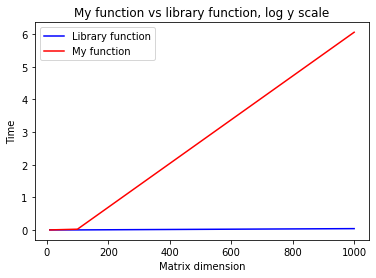

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

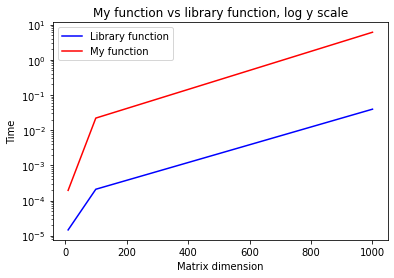

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
X = np.array([[1, 0], [10 ** 20, 1]])
Y = np.array([[10 ** -20, 1], [0, 1 - 10 ** 20]])

X1 = np.array([[1., 0.], [10. ** 20, 1.]],np.longdouble)
Y1 = np.array([[10. ** -20, 1.], [0., 1. - 10. ** 20]],np.longdouble)

print(X @ Y)
print(X1 @ Y1)

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
Правильный вариант перемножения - первый (с целыми числами). При перемножени с правающей точкой мы получим нижний правый элемент = 0, хотя он должен быть = 1, вот почему:

$$\left(\begin{matrix}
1 & 0 \\
100000000000000000000 & 1
\end{matrix}\right)
\cdot
\left(\begin{matrix}
\frac{1}{100000000000000000000} & 1 \\
0 & 1-10000000000000000000
\end{matrix}\right)
= 
\left(\begin{matrix}
\frac{1}{100000000000000000000} & 1 \\
1 & 1
\end{matrix}\right) $$



**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [ ]:
def my_pascal(dim):
    P = [[1 for _ in range(dim)] for _ in range(dim)]
    P = np.array(P)
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i][j - 1] + P[i - 1][j]
    return P

In [ ]:
#test
print(my_pascal(int(input())))

8
[[   1    1    1    1    1    1    1    1]
 [   1    2    3    4    5    6    7    8]
 [   1    3    6   10   15   21   28   36]
 [   1    4   10   20   35   56   84  120]
 [   1    5   15   35   70  126  210  330]
 [   1    6   21   56  126  252  462  792]
 [   1    7   28   84  210  462  924 1716]
 [   1    8   36  120  330  792 1716 3432]]


Чему равен её определитель? **Строго** поясните свой ответ.

----
**Определитель матрицы Паскаля всегда равен 1 и вот почему:
Попробуем привести матрицу Паскаляя к треугольному виду:
Начнём с того что будем вычетать из последней строки предпоследнюю, (из i вычетаем i - 1 строку и так n(размерность) - 1 раз, поскольку из первой строки мы ничего не вычетаем.
На следующем шаге мы делаем тоже самое только вычетам из i, i - 1 но не n - 1 раз, а уже n - 2 раза (из второй строки мы ничего не вычетаем, чтобы сохранить элемент на диагонали)
И так продолжаем до тех пор пока наша матрицы не примет верхнетреугольный вид, где на главной диагонали будут одни единицы => определитьли исходной матрицы будет равен произвдению элементов на главной диагонали изменённой матрицы и будет равен 1**

пример дляя размерности 5
\begin{equation*}
\begin{vmatrix} 
1 & 1 & 1 & 1 & 1\\
1 & 2 & 3 & 4 & 5\\
1 & 3 & 6 & 10 & 15\\
1 & 4 & 10 & 20 & 35\\
1 & 5 & 15 & 35 & 70 
\end{vmatrix}
\sim
\begin{vmatrix} 
1 & 1 & 1 & 1 & 1\\
0 & 1 & 2 & 3 & 4\\
0 & 1 & 3 & 6 & 10\\
0 & 1 & 4 & 10 & 20\\
0 & 1 & 5 & 15 & 35
\end{vmatrix}
\sim
\begin{vmatrix} 
1 & 1 & 1 & 1 & 1\\
0 & 1 & 2 & 3 & 4\\
0 & 0 & 1 & 3 & 6\\
0 & 0 & 1 & 4 & 10\\
0 & 0 & 1 & 5 & 15
\end{vmatrix}
\sim
\begin{vmatrix} 
1 & 1 & 1 & 1 & 1\\
0 & 1 & 2 & 3 & 4\\
0 & 0 & 1 & 0 & 2\\
0 & 0 & 0 & 1 & 4\\
0 & 0 & 0 & 1 & 5
\end{vmatrix}
\sim
\begin{vmatrix} 
1 & 1 & 1 & 1 & 1\\
0 & 1 & 2 & 3 & 4\\
0 & 0 & 1 & 0 & 2\\
0 & 0 & 0 & 1 & 4\\
0 & 0 & 0 & 0 & 1
\end{vmatrix}
\end{equation*}




А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [ ]:
print(f"{(sla.det(my_pascal(30))):.8f} вся 'прелесть' библиотечных функций ")
print(f"{my_det(my_pascal(30))} а вот самописная функция поиска определителя выводит верный результат, так как матрица паскаля приводится к верхнетреугольному виду, \n где на главной диагонали одни единицы => определитель равен 1")

-3400444993542750889466176477257844006739356239790080.00000000 вся 'прелесть' библиотечных функций 
1.0 а вот самописная функция поиска определителя выводит верный результат, так как матрица паскаля приводится к верхнетреугольному виду, 
 где на главной диагонали одни единицы => определитель равен 1


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [ ]:
def prod_and_sq_sum(A):
    return np.prod(np.diag(A)), np.sum(np.power(np.diag(A), 2))

In [ ]:
#test
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(X)
print(np.diag(X))
print(prod_and_sq_sum(X))


[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 5 9]
(45, 107)


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [ ]:
def f(A, B, lmbd, k):
    m,n = A.shape[0], A.shape[1]
    k = min(n, k)
    A = A[np.ix_(range(0, m), range(0, k))]
    B = B[np.ix_(range(0, m), range(0, k))]
    lmbd = lmbd[np.ix_(range(0, k))]
    return A * lmbd @ B.T

In [ ]:
#test
X = np.array([[1, 2, 3], [4, 5, 6], [7,8,9]])
Y = np.array([[11, 12, 13], [14, 15, 16], [17,18,19]])
lmbd = np.array([3,2,1])

print(f(X, Y, lmbd, 5))

[[120 150 180]
 [330 414 498]
 [540 678 816]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [ ]:
def get_diag(A, B):
    return np.einsum("ij,ji->i", A, B)

In [ ]:
#test
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(np.diag(X @ Y))

print(get_diag(X, Y))


[ 30  81 150]
[ 30  81 150]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [ ]:
def shrink_rotate(X, A, coef, angle):
    AX = np.array([A, X])
    AX_zer = np.array([0, AX[1] - A])
    AX_zer_coef = [[AX_zer[0]], [AX_zer[1] * coef]]
    rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]], np.longlong)
    AX_zer_rot = rot @ AX_zer_coef
    return complex(AX_zer_rot[1] + A)
    
def shrink_rotate_conj(X, A, coef=1., angle=0.):
    AX = np.array([A, X])
    AX_zer = np.array([0, AX[1] - A])
    AX_zer_coef = [[AX_zer[0]], [AX_zer[1] * coef]]
    rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]], np.longdouble)
    AX_zer_rot = rot @ AX_zer_coef
    AX_zer_rot = np.conj(AX_zer_rot)
    return complex(AX_zer_rot[1] + A)

    
def geometric_inverse(X, A, r):
    x0 = np.real(A)
    y0 = np.imag(A)
    x = np.real(X)
    y = np.imag(X)
    if x0 == 0 and y0 == 0 and r == 0:
        try:
            return complex(x / (x * x + y * y), y / (x * x + y * y))
        except ZeroDivisionError:
            return complex(X), "ИЗВИНИТЕ, но координаты входной точки совпадают с координатами цента окружности"
    else:
        try:
            return complex(x0 + ((r ** 2) * (x - x0)) / ((x - x0) ** 2 + (y - y0) ** 2),
                           y0 + ((r ** 2) * (y - y0)) / ((x - x0) ** 2 + (y - y0) ** 2))
        except ZeroDivisionError:
            return complex(X), "ИЗВИНИТЕ, но координаты входной точки совпадают с координатами цента окружности"

In [ ]:
#test
A = 10. + 6. * 1j
X = 2 + 4. * 1j
coef = 2
angle1 = 0
angle2 = 3.1415926535898
print(shrink_rotate(X,A,coef, angle1))
print(shrink_rotate_conj(X,A,coef, angle1))
print(shrink_rotate(X,A,coef, angle2))
print(shrink_rotate_conj(X,A,coef, angle2))
print(geometric_inverse(X, A, 2))


(-6+2j)
(-6+10j)
(26+10j)
(26+2j)
(9.529411764705882+5.882352941176471j)


**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

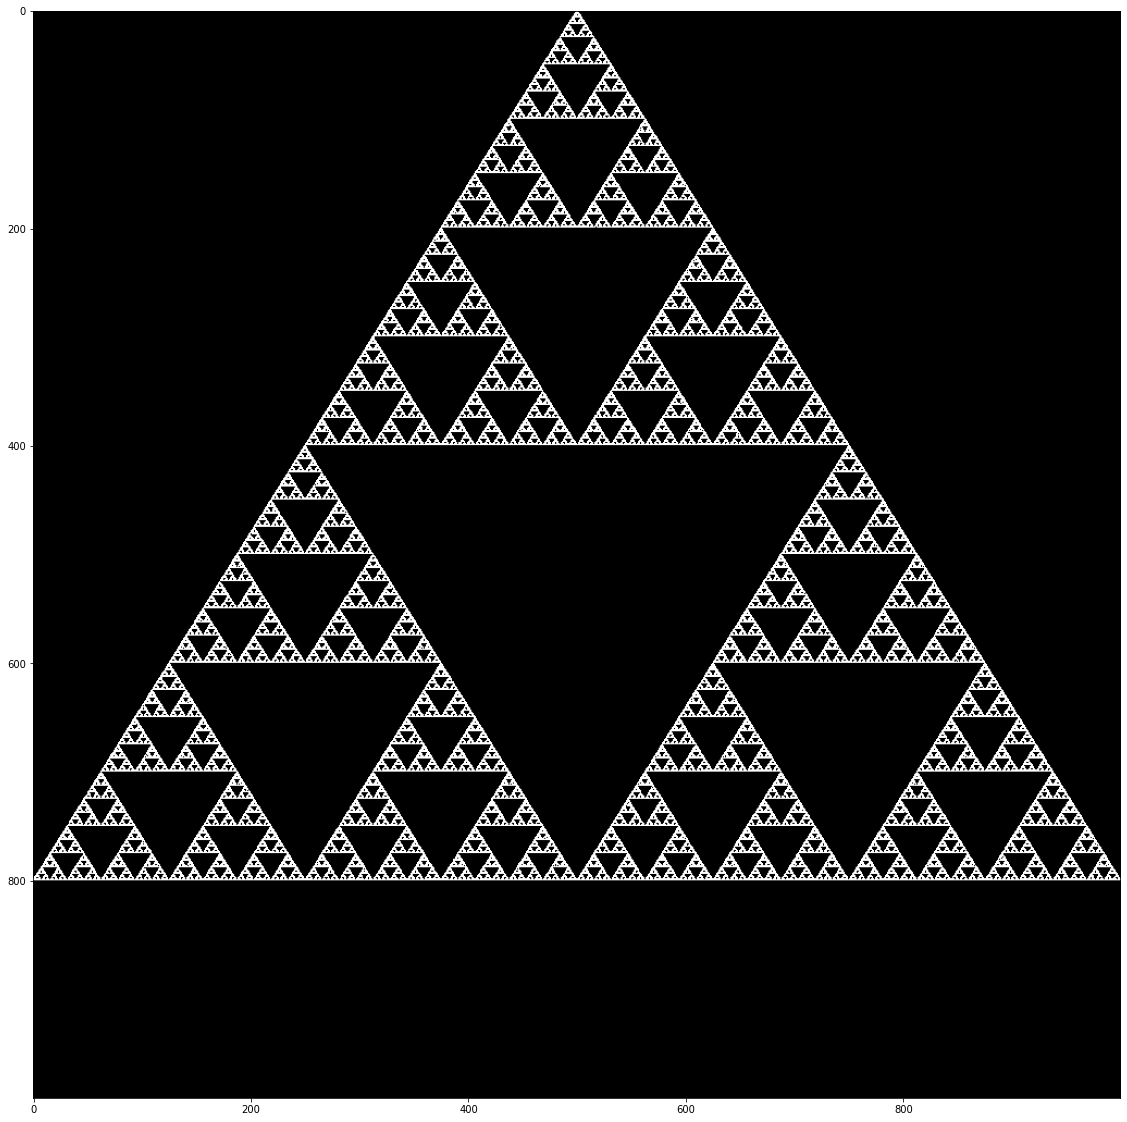

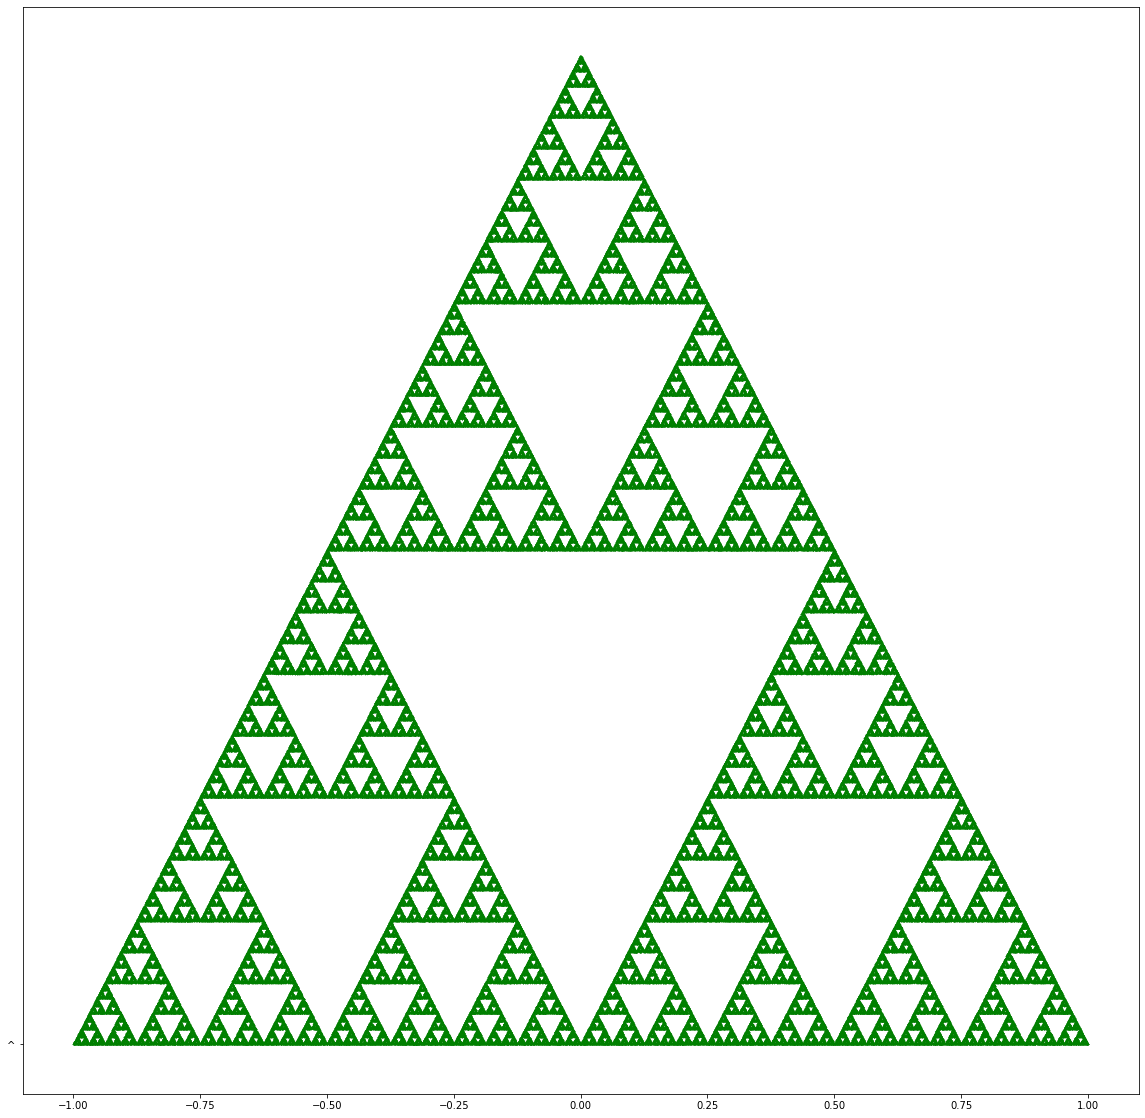

In [ ]:
z = 0.5 + 0.*1j
points = []
max_iter = 500000
M = np.zeros((1000,1000))
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1. * 1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0. * 1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0. * 1j, coef=0.5, angle=0.))]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 9:
      M[int(-np.imag(z) * 800 + 800)][int(np.real(z) * 500 + 500)] = 1
      points.append((np.real(z), np.imag(z)))
plt.figure(figsize=(20, 20))
plt.imshow(M, cmap = 'gray')
#######альтернативный способ вывода
plt.figure(figsize=(20, 20))
xx = [x for (x, y) in points]
yy = [y for (x, y) in points]
plt.plot(xx, yy, "g.", "^", markersize=1)
plt.show()

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Вообще полученная фигура называется треугольником Серпинского.
Существет несколько способов его построения, в нащем случае это метод хаоса.
Мы рандомно выбираем 1 из 3 способов построения вершины треугольника, где следующая точка зависит от предыдущей и находится на расстоянии вдвое меньше от прошлой. Это проделываем очень много раз. Если уменьшить количество итераций до 100, напрмер, и позапускать построение несколько раз то будет видно, что точки строятся хаотично, и паттерн всё время разный, но самы точки являютсяя вершинами треугольников. И спустя миллион или более итераци, когда точки уже будут накладываться друг на друга, будет видна чёткая фигура треугольника с меньшими пустыми треугольниками внутри(куда точки не могут попасть из-за ограниченности в выборе построения следующей точки). Так же видно, что самый большой треугольник, похож на более маленькие, из которых он состоит.Если мы будет бесконечно долго выполнять цикл и  "погружаться" внутрь треугольника, то мы постоянно будем видеть подобное строение треугольников.


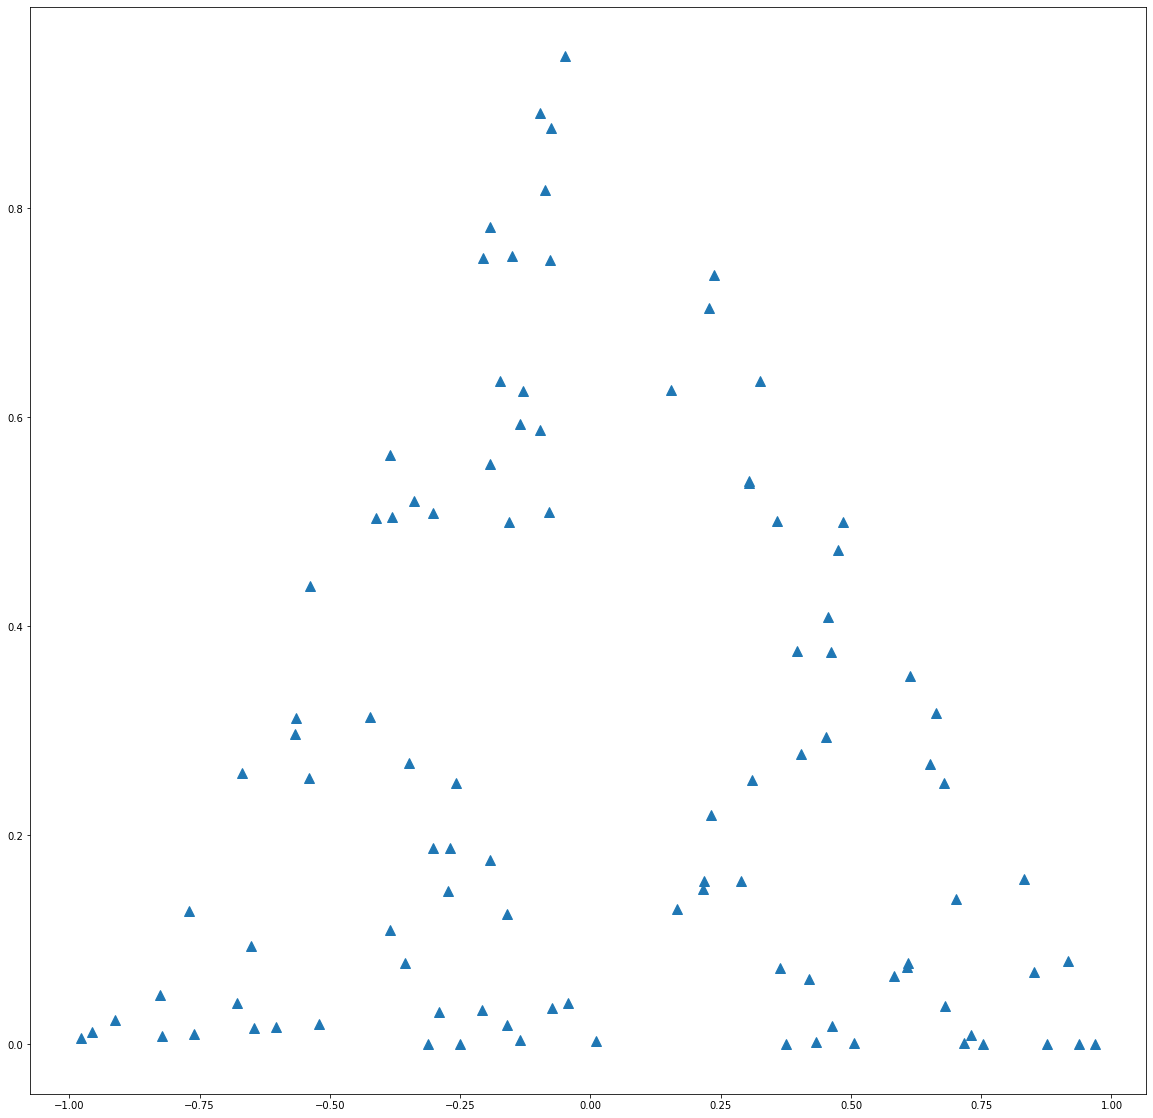

In [ ]:
#####ДЛЯ НАГЛЯЯДНОСТИ РАНДОМНОСТИ ПАТТЕРНА
plt.figure(figsize=(20, 20))
z = 0.5 + 0.*1j
points = []
max_iter = 100
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1. * 1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0. * 1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0. * 1j, coef=0.5, angle=0.))]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    points.append((np.real(z), np.imag(z)))

xx = [x for (x, y) in points]
yy = [y for (x, y) in points]

plt.plot(xx, yy, "^", markersize=10)
plt.show()

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

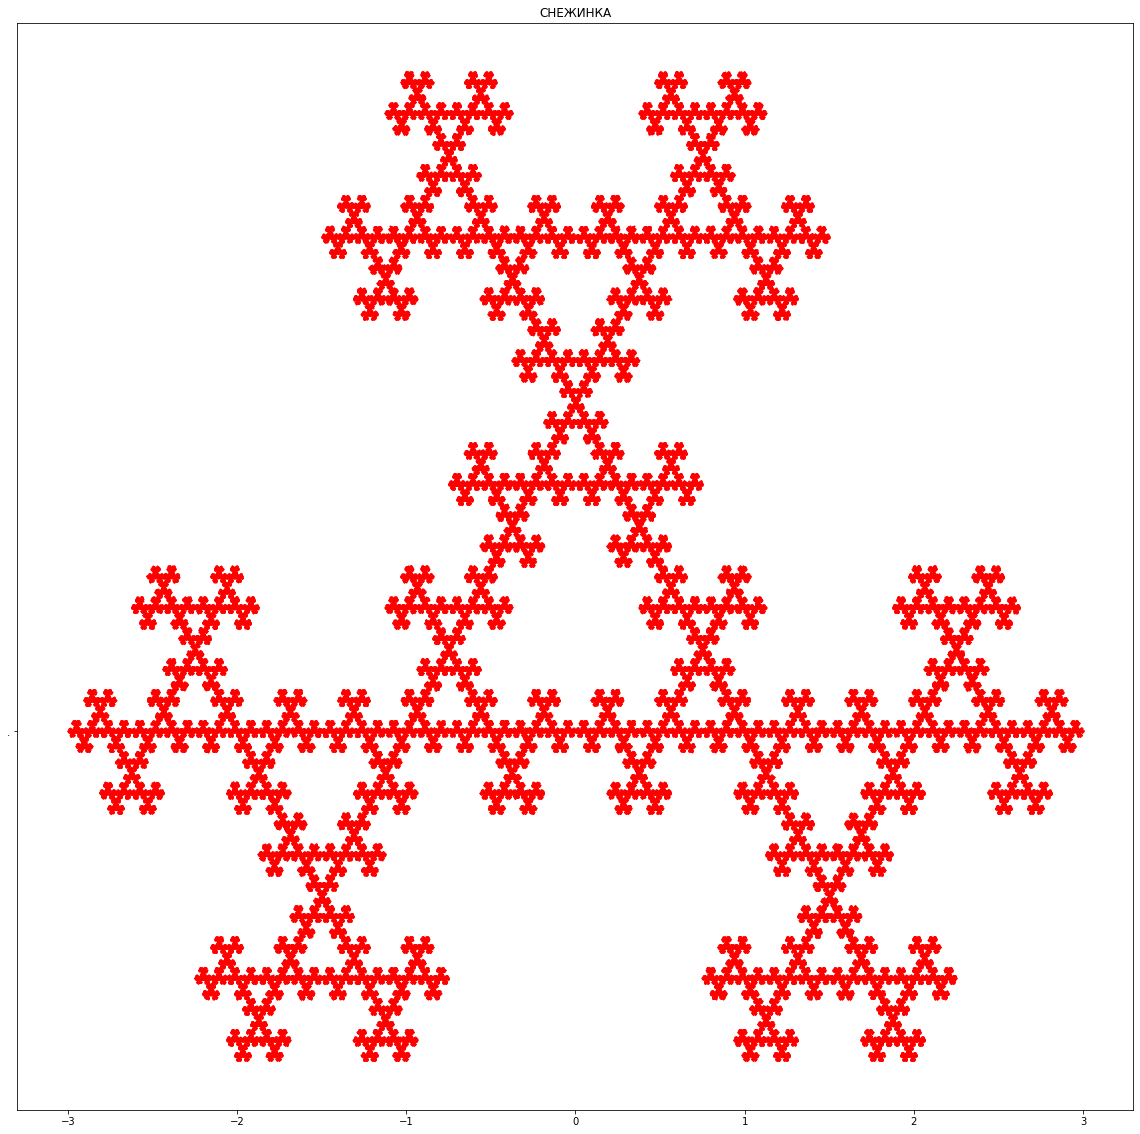

In [ ]:
plt.figure(figsize=(20, 20))
z = 0.5 + 0.*1j
points = []
max_iter = 500000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1. * 1j, coef=0.5, angle=np.pi)),
    (lambda t: shrink_rotate(t, 1. + 0. * 1j, coef=0.5, angle=np.pi)),
    (lambda t: shrink_rotate(t, -1. + 0. * 1j, coef=0.5, angle=np.pi))]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    points.append((np.real(z), np.imag(z)))

xx = [x for (x, y) in points]
yy = [y for (x, y) in points]
plt.title("СНЕЖИНКА")
plt.plot(xx, yy, "r.", ".", markersize=2)
plt.show()